In [112]:
#Importing Pandas to read the csv file within the next two lines. Importing datetime to have the current date and time. Then I am also importing matplotlib to plot my graphs. 
import pandas as pd
import datetime
from matplotlib import pyplot as plt

In [113]:
#this is bringing in the csv file for project information. 
data = pd.read_csv("Unicorn_Companies.csv")

In [114]:
#Using this line of code to remove all the columns we don't need for the project to work. 
cleaned_data = data.drop(columns=["Portfolio Exits" , "Deal Terms" , "Investors Count" , "Financial Stage", "Total Raised",
"Select Inverstors", "Industry", "City", "Country", "Date Joined", "Valuation ($B)"])
cleaned_data.loc[cleaned_data['Founded Year'] == 'None', 'Founded Year'] = 0
cleaned_data = cleaned_data.astype({'Founded Year': 'int64'})

In [115]:
#This row checks our work to make sure the data has been cleaned to the point we need it to be. 
cleaned_data.head()


,Company,Founded Year
0,Bytedance,2012
1,SpaceX,2002
2,Stripe,2010
3,Klarna,2005
4,Epic Games,1991


In [116]:
#This line is showing you that the outcome  
cleaned_data.dtypes


Company         object
Founded Year     int64
dtype: object

In [117]:
#This line of code basically does math so I can have the ages of each company. 
cleaned_data['age'] = cleaned_data.apply(lambda row: datetime.datetime.now().date().year - row['Founded Year'], axis=1)
cleaned_data.head()

,Company,Founded Year,age
0,Bytedance,2012,10
1,SpaceX,2002,20
2,Stripe,2010,12
3,Klarna,2005,17
4,Epic Games,1991,31


In [118]:
#This line clears out anything that is has none or not a number in the age column. 
cleaned_data = cleaned_data[cleaned_data['Founded Year'] != 0]

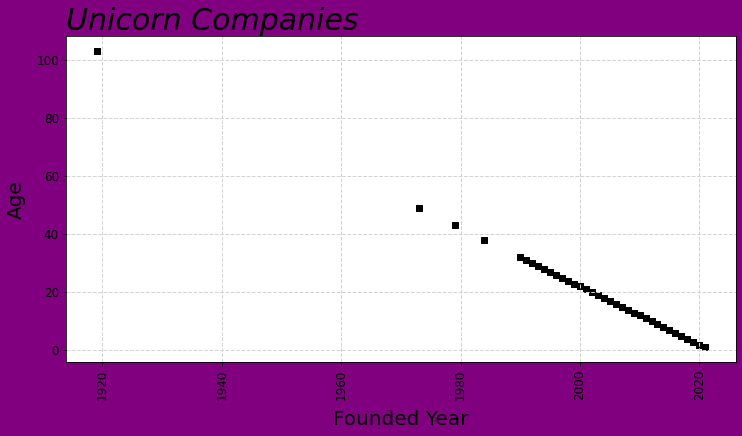

(1919.0, 2021.0)

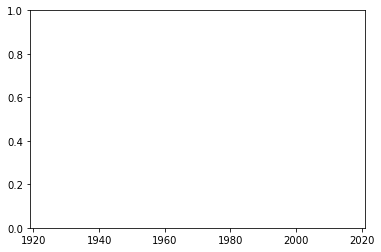

In [119]:
#This graph shows ages of companies it was hard to make it perfect due to the mulitude of how many there was. 
plt.figure(figsize = (12, 6), facecolor = "purple")
plt.scatter(cleaned_data['Founded Year'], cleaned_data['age'], marker = 's', color = "black")
plt.xlabel("Founded Year", fontsize = 20, labelpad=10)
plt.ylabel("Age", fontsize = 20, labelpad=10)
plt.grid(color = "lightgrey", linestyle = "--", linewidth = 1)
plt.xticks(rotation="vertical")
plt.tick_params(axis = "both", labelsize = "large")
plt.title("Unicorn Companies", fontsize=30, loc = "left", fontstyle = "oblique", color = "black")
plt.show()
plt.xlim(min(cleaned_data['Founded Year']),max(cleaned_data['Founded Year']))


In [120]:
#With the Csv file we were able to find out the median,Mean,Mode.in the following lines (Continued) 
cleaned_data['age'].median()

8.0

In [121]:
#Mean 
cleaned_data['age'].mean()

9.289738430583501

In [122]:
#mode 
cleaned_data['age'].mode()

0    7
dtype: int64

In [123]:
#this line brings up any company under the age of 46 
cleaned_data[cleaned_data['age'] <46]

,Company,Founded Year,age
0,Bytedance,2012,10
1,SpaceX,2002,20
2,Stripe,2010,12
3,Klarna,2005,17
4,Epic Games,1991,31
...,...,...,...
1032,Timescale,2015,7
1033,Scalapay,2019,3
1034,Omada Health,2011,11
1035,BlueVoyant,2017,5


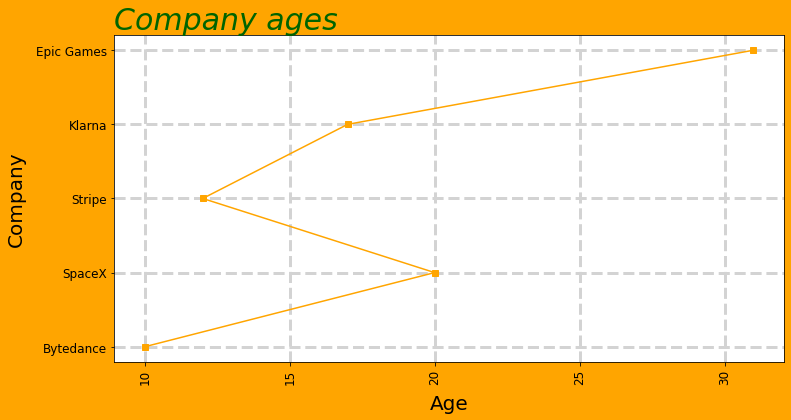

In [124]:
#This Graph shows the first 5 companies on the Unicorn csv file. 
plt.figure(figsize = (12, 6), facecolor = "orange")
plt.plot(cleaned_data['age'].head(), cleaned_data['Company'].head(), marker = 's', color = "orange") 
plt.xlabel("Age", fontsize = 20, labelpad=10)
plt.ylabel("Company", fontsize = 20, labelpad=10) 
plt.grid(color = "lightgrey", linestyle = "--", linewidth = 3)
plt.xticks( rotation="vertical")
plt.tick_params(axis = "both", labelsize = "large")
plt.title("Company ages", fontsize=30, loc = "left", fontstyle = "oblique", color = "darkgreen")
plt.show()


In [125]:
#In conclusion I have learned quite a bit. Just in this project alone I learned there is at least over 1000 Unicorn Companies and according to 
#investopedia anything defined as a Unicorn Company is an business refers to a startup company with a value of over $1 billion. Now with python 
#I learned some difficult things and honestly it took help to get some of these things such as Matplotlib and how to erase columns I no longer 
#need. I learned things like for loops and fuctions, I learned how to research things I didn't understand. I also learned to ask for help too. 
#So in short I never had a day I didn't try something new and read. I also know I will be practicing before this next session too. 